In [33]:
# %pip install emoji
# %pip install deep_translator
# %pip install contractions
# nltk.download('wordnet')

import pandas as pd
import re
import emoji
import wordninja
from emoticon_lib import replace_emoticons_with_text
import html
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, words
import contractions
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from collections import Counter


In [34]:
df = pd.read_csv('cyberbullying_tweets.csv')

### DATA UNDERSTANDING

In [35]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [36]:
df.tail()

,tweet_text,cyberbullying_type
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity
47691,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...,ethnicity


In [37]:
# Data Dimension
df.shape

(47692, 2)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [39]:
# Descriptive statistis 
df.describe()

,tweet_text,cyberbullying_type
count,47692,47692
unique,46017,6
top,RT @sailorhg: the intro for my hardware hackin...,religion
freq,2,7998


In [40]:
# Check for null values
df.isna().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [41]:
# Unique values of target variable (cyberbullying_type)
df.cyberbullying_type.unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [42]:
# Count of values of target variable
df['cyberbullying_type'].value_counts()

cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64

In [43]:
print('Num of Duplicated Rows:', df.duplicated().sum())

Num of Duplicated Rows: 36


### DATA CLEANING

In [44]:
# Remove Duplicate Rows
df =df.drop_duplicates(subset='tweet_text', keep="last")
df.shape

(46017, 2)

In [45]:
# Expand contraction
df['tweet_text'] = df['tweet_text'].apply(lambda e: contractions.fix(e))
print(df.head(10).to_markdown())

|    | tweet_text                                                                                                                          | cyberbullying_type   |
|---:|:------------------------------------------------------------------------------------------------------------------------------------|:---------------------|
|  0 | In other words #katandandre, your food was crapilicious! #mkr                                                                       | not_cyberbullying    |
|  1 | Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc                 | not_cyberbullying    |
|  2 | @XochitlSuckkks a classy whore? Or more red velvet cupcakes?                                                                        | not_cyberbullying    |
|  4 | @RudhoeEnglish This is an ISIS account pretending to be a Kurdish account.  Like Islam, it is all lies.                             | not_cyberbullying    |
|  5 | @Raja5aab

In [46]:
#Remove html tags
df['tweet_text'] = df['tweet_text'].apply(lambda e: html.unescape(e))

In [47]:
# Remove emoticons
df['tweet_text'] = df['tweet_text'].apply(lambda e: replace_emoticons_with_text(e))

In [48]:
# Remove email 
df['tweet_text'] = df['tweet_text'].apply(lambda e: re.sub(r"\S+@\S+(?:\.\S+)+", "", e))
print(df.head(10).to_markdown())

|    | tweet_text                                                                                                                          | cyberbullying_type   |
|---:|:------------------------------------------------------------------------------------------------------------------------------------|:---------------------|
|  0 | In other words #katandandre, your food was crapilicious! #mkr                                                                       | not_cyberbullying    |
|  1 | Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc                 | not_cyberbullying    |
|  2 | @XochitlSuckkks a classy whore? Or more red velvet cupcakes?                                                                        | not_cyberbullying    |
|  4 | @RudhoeEnglish This is an ISIS account pretending to be a Kurdish account.  Like Islam, it is all lies.                             | not_cyberbullying    |
|  5 | @Raja5aab

In [49]:
## Remove RT, #, URL and @: 
df['tweet_text'] = df['tweet_text'].apply(lambda e: re.sub(r"(RT)|(?:\@|\#|https?|http?|www)\S+", "", e))
print(df.head(10).to_markdown())

|    | tweet_text                                                                                                  | cyberbullying_type   |
|---:|:------------------------------------------------------------------------------------------------------------|:---------------------|
|  0 | In other words  your food was crapilicious!                                                                 | not_cyberbullying    |
|  1 | Why is  so white?                                                                                           | not_cyberbullying    |
|  2 | a classy whore? Or more red velvet cupcakes?                                                                | not_cyberbullying    |
|  4 | This is an ISIS account pretending to be a Kurdish account.  Like Islam, it is all lies.                    | not_cyberbullying    |
|  5 | Yes, the test of god is that good or bad or indifferent or weird or whatever, it all proves gods existence. | not_cyberbullying    |
|  6 | Itu sekolah y

In [50]:
# Replace underscore with whitespace 
df['tweet_text'] = df['tweet_text'].apply(lambda e: e.replace('_', ' '))

In [51]:
# Convert emojis to text
df['tweet_text'] = df['tweet_text'].apply(lambda e: emoji.demojize(e, language="en"))

In [52]:
# Replace underscore resulted by emoji-to-text with whitespace
df['tweet_text'] = df['tweet_text'].apply(lambda e: e.replace('_', ' '))
# Remove semicolon(:) resulted by emoji-to-text
df['tweet_text'] = df['tweet_text'].apply(lambda e: e.replace(':', ''))

In [53]:
# Word Segmentation  
df['tweet_text'] = df['tweet_text'].apply(lambda x: ' '.join(wordninja.split(x)))
print(df.head(10).to_markdown())

|    | tweet_text                                                                                                | cyberbullying_type   |
|---:|:----------------------------------------------------------------------------------------------------------|:---------------------|
|  0 | In other words your food was crap i licious                                                               | not_cyberbullying    |
|  1 | Why is so white                                                                                           | not_cyberbullying    |
|  2 | a classy whore Or more red velvet cupcakes                                                                | not_cyberbullying    |
|  4 | This is an IS IS account pretending to be a Kurdish account Like Islam it is all lies                     | not_cyberbullying    |
|  5 | Yes the test of god is that good or bad or in different or weird or whatever it all proves gods existence | not_cyberbullying    |
|  6 | It u sekolah ya buk an temp

In [55]:
# Replace tweet_text with empty string or whitespace with NaN
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
# Filter out rows with NaN values in tweet_text
df = df[df['tweet_text'].notna()]   
df.shape

(45910, 2)

In [56]:
# Remove any special characters including punctuation and digits
df['tweet_text'] = df['tweet_text'].apply(lambda e: re.sub(r'[^a-zA-Z ]', '', e))

In [59]:
# Normalize Words: Remove words with 1 character and words with 3 or more repeating characters
def remove_words_with_one_char_or_repeating_chars(text):   
    text = re.sub(r'\b\w\b', '', text)                 # Remove words with 1 character
    text = re.sub(r'\b\w*(\w)\1{2,}\w*\b', '', text)   # Remove words with 3 or more repeating characters
    return text
df['tweet_text'] = df['tweet_text'].apply(remove_words_with_one_char_or_repeating_chars)
print(df.head(10).to_markdown())

|    | tweet_text                                                                                                | cyberbullying_type   |
|---:|:----------------------------------------------------------------------------------------------------------|:---------------------|
|  0 | In other words your food was crap  licious                                                                | not_cyberbullying    |
|  1 | Why is so white                                                                                           | not_cyberbullying    |
|  2 | classy whore Or more red velvet cupcakes                                                                  | not_cyberbullying    |
|  4 | This is an IS IS account pretending to be  Kurdish account Like Islam it is all lies                      | not_cyberbullying    |
|  5 | Yes the test of god is that good or bad or in different or weird or whatever it all proves gods existence | not_cyberbullying    |
|  6 | It  sekolah ya buk an temp 

In [60]:
# Remove extra whitespaces after removing noise and punctuations
def remove_extra_whitespaces(text):  
    text = re.sub(r'\s+', ' ', text)   # Replace multiple consecutive whitespaces with a single space
    return text.strip()                # Remove leading and trailing whitespaces
df['tweet_text'] = df['tweet_text'].apply(remove_extra_whitespaces)

In [61]:
# Convert to lower case
df['tweet_text'] = df['tweet_text'].str.lower()

In [62]:
# Tokenization
def tokenize_text(text):
    if isinstance(text, str):  # Check if text is a string
        tokens = word_tokenize(text)
        return tokens
    else:
        return []  # Return an empty list for NaN values

df['tweet_text'] = df['tweet_text'].apply(tokenize_text)
print(df.head(10).to_markdown())

|    | tweet_text                                                                                                                                                                   | cyberbullying_type   |
|---:|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:---------------------|
|  0 | ['in', 'other', 'words', 'your', 'food', 'was', 'crap', 'licious']                                                                                                           | not_cyberbullying    |
|  1 | ['why', 'is', 'so', 'white']                                                                                                                                                 | not_cyberbullying    |
|  2 | ['classy', 'whore', 'or', 'more', 'red', 'velvet', 'cupcakes']                                                                                                               

In [63]:
# Remove Stop Words
stopword = stopwords.words('english')
def remove_stopwords(tokens): 
    non_stopwords = [word for word in tokens if word not in stopword]
    return non_stopwords
df['tweet_text'] = df['tweet_text'].apply(remove_stopwords)
print(df.head(10).to_markdown())

|    | tweet_text                                                                                             | cyberbullying_type   |
|---:|:-------------------------------------------------------------------------------------------------------|:---------------------|
|  0 | ['words', 'food', 'crap', 'licious']                                                                   | not_cyberbullying    |
|  1 | ['white']                                                                                              | not_cyberbullying    |
|  2 | ['classy', 'whore', 'red', 'velvet', 'cupcakes']                                                       | not_cyberbullying    |
|  4 | ['account', 'pretending', 'kurdish', 'account', 'like', 'islam', 'lies']                               | not_cyberbullying    |
|  5 | ['yes', 'test', 'god', 'good', 'bad', 'different', 'weird', 'whatever', 'proves', 'gods', 'existence'] | not_cyberbullying    |
|  6 | ['sekolah', 'ya', 'buk', 'temp', 'bully', 'ga', 

In [64]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatize_words(tokens):
    return ' '.join([lemmatizer.lemmatize(word) for word in tokens])
df["tweet_text"] = df["tweet_text"].apply(lemmatize_words)
print(df.head(10).to_markdown())

|    | tweet_text                                                        | cyberbullying_type   |
|---:|:------------------------------------------------------------------|:---------------------|
|  0 | word food crap licious                                            | not_cyberbullying    |
|  1 | white                                                             | not_cyberbullying    |
|  2 | classy whore red velvet cupcake                                   | not_cyberbullying    |
|  4 | account pretending kurdish account like islam lie                 | not_cyberbullying    |
|  5 | yes test god good bad different weird whatever prof god existence | not_cyberbullying    |
|  6 | sekolah ya buk temp bully ga uh kaya ne raka                      | not_cyberbullying    |
|  7 | karma hope bite kat butt nasty                                    | not_cyberbullying    |
|  9 | rebecca black drop school due bullying                            | not_cyberbullying    |
| 10 | annoyed undec

In [65]:
# Remove any non-English words
english_words = set(words.words())
def remove_non_english(tokens):
    english_tokens = []
    for word in tokens:
        if word in english_words:
            english_tokens.append(word)
        else:
            english_tokens.append('')
    return [token for token in english_tokens if token != '']

df['tweet_text'] = df['tweet_text'].apply(tokenize_text)
df['tweet_text'] = df['tweet_text'].apply(remove_non_english)
print(df.head(10).to_markdown())

|    | tweet_text                                                                                          | cyberbullying_type   |
|---:|:----------------------------------------------------------------------------------------------------|:---------------------|
|  0 | ['word', 'food', 'crap']                                                                            | not_cyberbullying    |
|  1 | ['white']                                                                                           | not_cyberbullying    |
|  2 | ['classy', 'whore', 'red', 'velvet', 'cupcake']                                                     | not_cyberbullying    |
|  4 | ['account', 'account', 'like', 'lie']                                                               | not_cyberbullying    |
|  5 | ['yes', 'test', 'god', 'good', 'bad', 'different', 'weird', 'whatever', 'prof', 'god', 'existence'] | not_cyberbullying    |
|  6 | ['ya', 'temp', 'bully', 'ga', 'ne']                                  

In [66]:
# Data dimension after removing all preprocessing steps
df.shape

(45910, 2)

In [67]:
# Join the tokenized tweet_text to check for duplicated rows
df['tweet_text'] = df['tweet_text'].apply(lambda tokens: ' '.join(tokens))
print("Total number of duplicated rows: ", df.duplicated().sum ())

Total number of duplicated rows:  1927


In [68]:
# Remove duplicated rows
duplicate_rows = df[df.duplicated(keep=False)]
print(duplicate_rows)
df.drop_duplicates(subset=["tweet_text"], inplace=True)
print("After removing duplicate rows: ", df.shape)

                                       tweet_text cyberbullying_type
26                                       bullying  not_cyberbullying
31                                                 not_cyberbullying
39                                                 not_cyberbullying
55                                                 not_cyberbullying
83                          bullying contra o sol  not_cyberbullying
...                                           ...                ...
47661                 fat white bitch dumb nigger          ethnicity
47663  get dick tonight mad black man dumb nigger          ethnicity
47670     scale cracker pretzel salty dumb nigger          ethnicity
47674                              ya dumb nigger          ethnicity
47690            yea nigger un follow dumb nigger          ethnicity

[2533 rows x 2 columns]
After removing duplicate rows:  (43766, 2)


In [69]:
# After removing duplicated rows
df.duplicated().sum()

0

In [70]:
# Row index with empty string in tweet_text
df[df['tweet_text'] == '']

,tweet_text,cyberbullying_type
31,,not_cyberbullying


In [71]:
# Remove rows with empty string in tweet_text
df = df[df['tweet_text'] != '']
df.shape

(43765, 2)

In [72]:
# Save processed df into new csv file
df.to_csv('joined_cyberbullying_tweet.csv', index=False)

### Exploratory Data Analysis

In [76]:
df_processed = pd.read_csv('joined_cyberbullying_tweet.csv')
df_processed.shape

(43765, 2)

In [77]:
# Convert data types to string
df_processed['cyberbullying_type'] = df_processed['cyberbullying_type'].astype(str)
df_processed['tweet_text'] = df_processed['tweet_text'].astype(str)

In [78]:
# Word cloud of overall data
word_string=" ".join(df_processed['tweet_text'])
wordcloud = WordCloud(background_color="white", max_words=50, max_font_size= 300, 
                      width=1400, height=800).generate(word_string)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title(f"Word Cloud",fontsize=25)
plt.show()

ValueError: Only supported for TrueType fonts

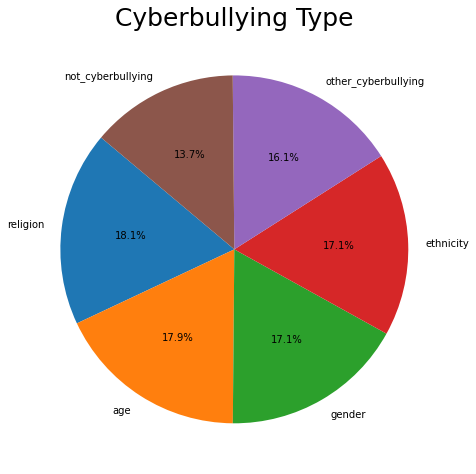

In [ ]:
# Count of Target Variable
categories = df_processed['cyberbullying_type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(categories, labels=categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Cyberbullying Type',fontsize=25)
plt.show()

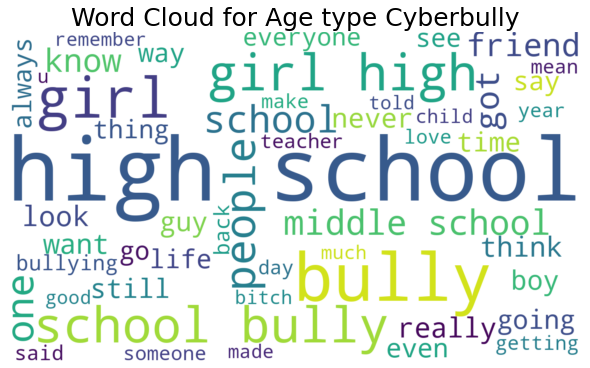

In [ ]:
# Word Cloud for Age type Cyberbully
word_string=" ".join(df_processed[df_processed['cyberbullying_type'] == 'age']['tweet_text'])
wordcloud = WordCloud(background_color="white", max_words=50, max_font_size= 300, 
                      width=1400, height=800).generate(word_string)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title(f"Word Cloud for Age type Cyberbully",fontsize=25)
plt.show()

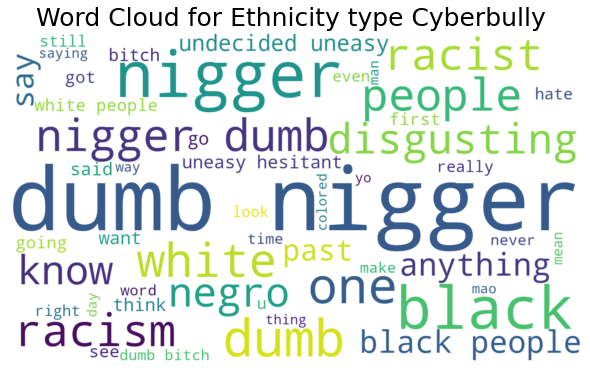

In [ ]:
# Word Cloud for Ethnicity type Cyberbully 
word_string=" ".join(df_processed[df_processed['cyberbullying_type'] == 'ethnicity']['tweet_text'])
wordcloud = WordCloud(background_color="white", max_words=50, max_font_size= 300,
                      width=1400, height=800).generate(word_string)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title(f"Word Cloud for Ethnicity type Cyberbully ",fontsize=25)
plt.show()

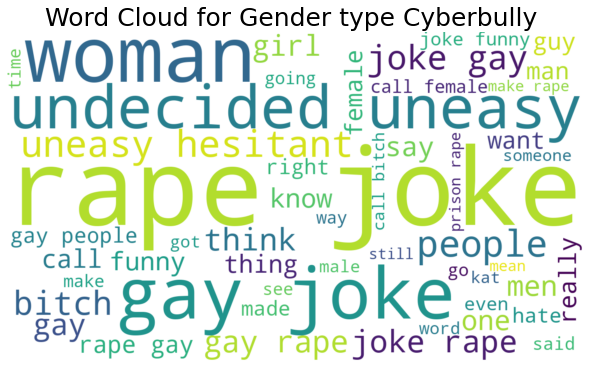

In [ ]:
# Word Cloud for Gender type Cyberbully 
word_string=" ".join(df_processed[df_processed['cyberbullying_type'] == 'gender']['tweet_text'])
wordcloud = WordCloud(background_color="white", max_words=50, max_font_size= 300, 
                      width=1400, height=800).generate(word_string)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title(f"Word Cloud for Gender type Cyberbully ",fontsize=25)
plt.show()

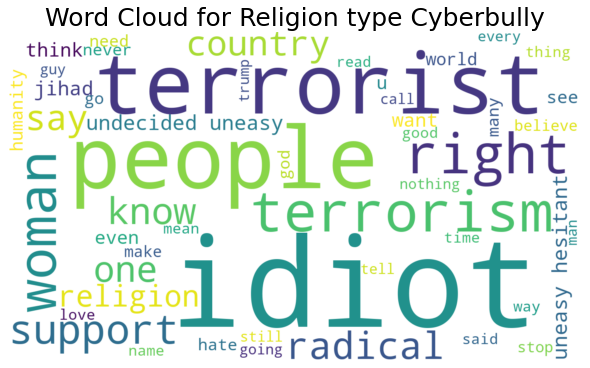

In [ ]:
# Word Cloud for Religion type Cyberbully 
word_string=" ".join(df_processed[df_processed['cyberbullying_type'] == 'religion']['tweet_text'])
wordcloud = WordCloud(background_color="white", max_words=50, max_font_size= 300,  
                      width=1400, height=800).generate(word_string)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title(f"Word Cloud for Religion type Cyberbully",fontsize=25)
plt.show()

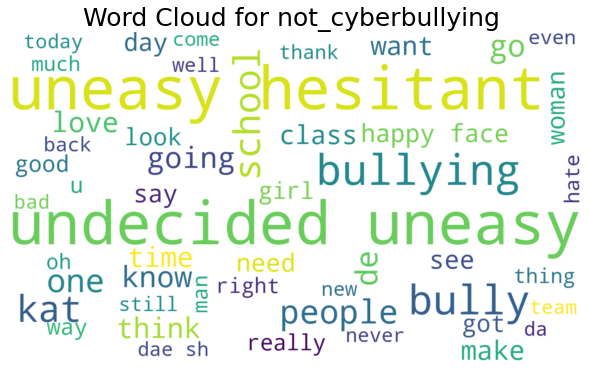

In [ ]:
# Word Cloud for not_cyberbullying 
word_string=" ".join(df_processed[df_processed['cyberbullying_type'] == 'not_cyberbullying']['tweet_text'])
wordcloud = WordCloud(background_color="white", max_words=50, max_font_size= 300, 
                      width=1400, height=800).generate(word_string)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title(f"Word Cloud for not_cyberbullying ",fontsize=25)
plt.show()

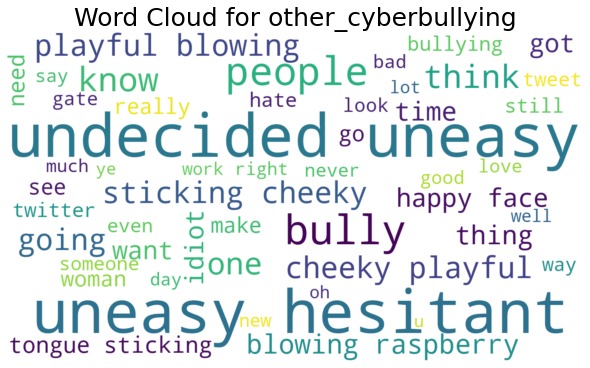

In [ ]:
# Word Cloud for other_cyberbullying
word_string=" ".join(df_processed[df_processed['cyberbullying_type'] == 'other_cyberbullying']['tweet_text'])
wordcloud = WordCloud(background_color="white", max_words=50, max_font_size= 300,
                      width=1400, height=800).generate(word_string)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title(f"Word Cloud for other_cyberbullying",fontsize=25)
plt.show()

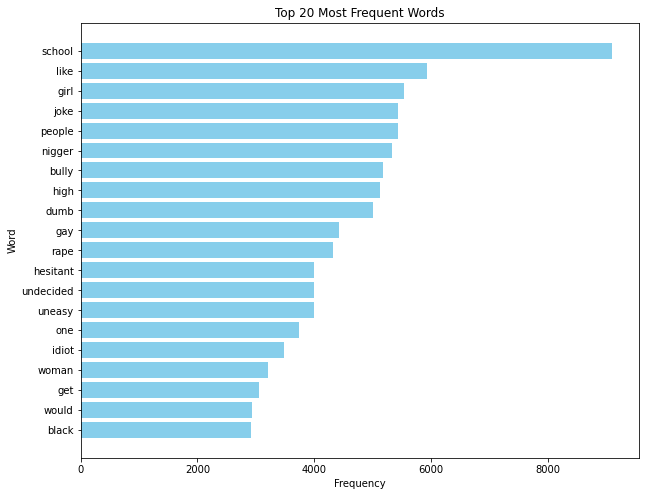

In [ ]:
# Top 20 Most Frequent Words
df_processed['tokens'] = df_processed['tweet_text'].apply(word_tokenize)
all_tokens = [token for sublist in df_processed['tokens'] for token in sublist]
word_counts = Counter(all_tokens)
top_20_words = word_counts.most_common(20)
words, frequencies = zip(*top_20_words)

plt.figure(figsize=(10, 8))
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 20 Most Frequent Words')
plt.gca().invert_yaxis()  # Invert y-axis to have the most frequent word on top
plt.show()

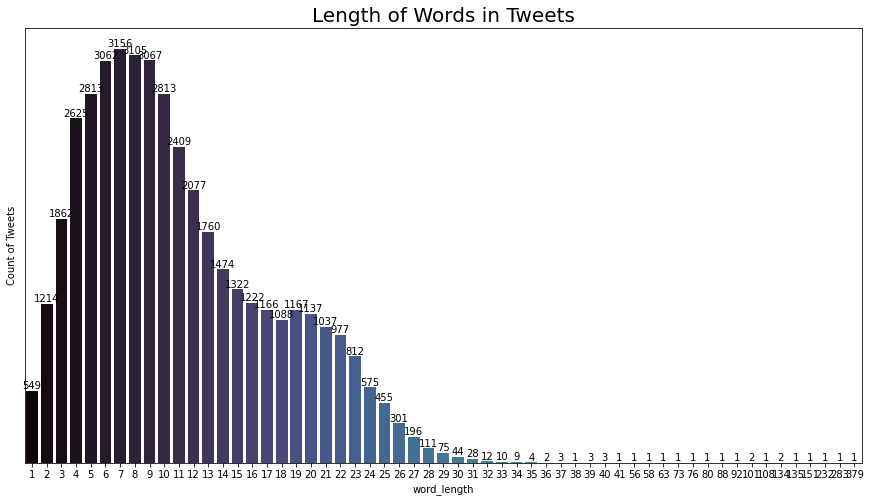

In [ ]:
# Word length of tweets
df_processed['word_length'] = df_processed['tokens'].apply(lambda x: len(x))
plt.figure(figsize=(15,8))
ax = sns.countplot(x=df_processed['word_length'], palette='mako')
plt.title('Length of Words in Tweets', fontsize=20)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('Count of Tweets')
plt.show()

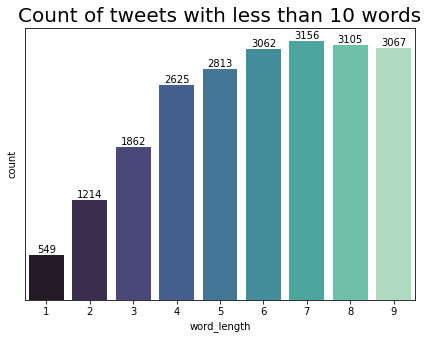

In [ ]:
# Count of tweets with less than 10 words
less_than_10_words = df_processed[df_processed['word_length'] < 10]
plt.figure(figsize=(7,5))
ax = sns.countplot(x='word_length', data=df_processed[df_processed['word_length']<10], palette='mako')
plt.title('Count of tweets with less than 10 words', fontsize=20)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.show()
